In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [24]:
#! pip install scikit-learn==1.2.0
#! pip install matplotlib==3.7.2

In [2]:
train_csv_path = './optical_injection_locking.csv'
train_csv = pd.read_csv(train_csv_path)

In [3]:
train_csv.head(-1)

,id,injection_ratio,detuning_frequency,emitted_light_beam_intensity,angle_with_main_beam,amplitude,affecting_parameter
0,1,-20.95070,3.78930,578.24,17.52,215.76,Slave laser power
1,2,-21.56829,3.91056,577.59,17.67,215.34,Temperature
2,3,-21.65926,3.59251,579.61,17.56,215.74,Master laser power
3,4,-21.92257,3.73961,578.36,17.48,215.78,Temperature
4,5,-21.30498,3.66606,576.82,17.31,215.59,Input power
...,...,...,...,...,...,...,...
1016,1017,-34.95424,0.92684,578.45,11.19,215.37,Temperature
1017,1018,-34.48028,0.98647,579.34,11.18,215.83,Master laser power
1018,1019,-32.18226,1.25682,579.37,11.14,215.64,Temperature
1019,1020,-30.50184,1.46355,578.87,12.27,215.28,Input power


In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1022 non-null   int64  
 1   injection_ratio               1022 non-null   float64
 2   detuning_frequency            1022 non-null   float64
 3   emitted_light_beam_intensity  1022 non-null   float64
 4   angle_with_main_beam          1022 non-null   float64
 5   amplitude                     1022 non-null   float64
 6   affecting_parameter           1022 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 56.0+ KB


In [5]:
train_csv['affecting_parameter'].value_counts()

affecting_parameter
Temperature           280
Input power           258
Master laser power    245
Slave laser power     239
Name: count, dtype: int64

In [6]:
x = train_csv['detuning_frequency']
y = train_csv['injection_ratio']
x_list =[]
y_list =[]
for i in range(len(x)):
    x_list.append(x[i])
for j in range(len(y)):
    y_list.append(y[j])
print(y_list)

[-20.9507, -21.56829, -21.65926, -21.92257, -21.30498, -22.2194, -22.30557, -21.56829, -23.16254, -22.83699, -22.68858, -23.10031, -22.86572, -23.66045, -22.00875, -22.89444, -23.30617, -23.36841, -23.80886, -23.75141, -23.21999, -22.39175, -23.95727, -24.45997, -23.83759, -24.60359, -24.72328, -25.10628, -25.10628, -25.57546, -25.78611, -25.16373, -25.3696, -26.22657, -26.10688, -26.55212, -25.60897, -25.40311, -25.99198, -26.75798, -26.63829, -26.96385, -27.43303, -26.87288, -29.35283, -27.99317, -31.29657, -34.24569, -34.74359, -40.64184, -40.20138, -44.32824, -42.85368, -42.40844, -44.35696, -44.91711, -44.35696, -44.76869, -43.94524, -43.79682, -42.05895, -43.00209, -44.85487, -41.52753, -43.05954, -40.96739, -39.90456, -40.55087, -41.70467, -42.40844, -42.64781, -43.38509, -39.84711, -38.90396, -37.72144, -39.13855, -39.43059, -38.28158, -36.33784, -37.51558, -37.01767, -34.77711, -35.48087, -35.92611, -32.38812, -32.7424, -34.09728, -29.38155, -31.41626, -28.61555, -26.72926, -2

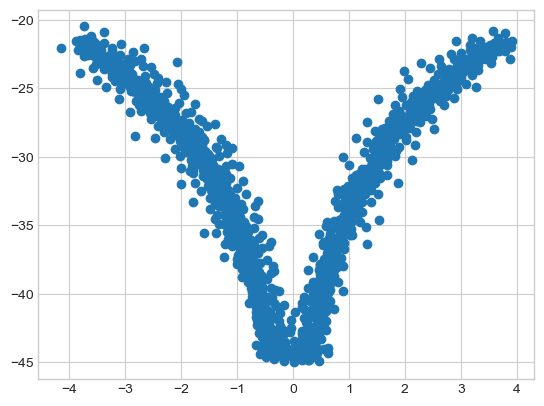

In [7]:
plt.scatter(x,y)

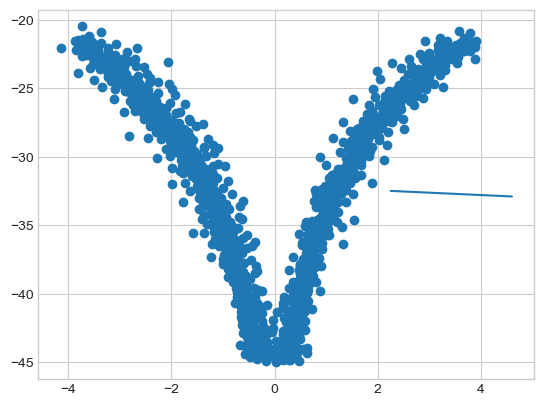

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x_array = np.array(x_list)
y_array = np.array(y_list)
model.fit(x_array[:,np.newaxis], y_array)

xfit = np.linspace(2.25,4.6,1000)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
# x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x_array[:,None])

array([[ 3.7893    , 14.35879449, 54.40977996],
       [ 3.91056   , 15.29247951, 59.80215869],
       [ 3.59251   , 12.9061281 , 46.36539426],
       ...,
       [ 1.46355   ,  2.1419786 ,  3.13489278],
       [ 1.63649   ,  2.67809952,  4.38268308],
       [ 1.84322   ,  3.39745997,  6.26226616]])

In [10]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())

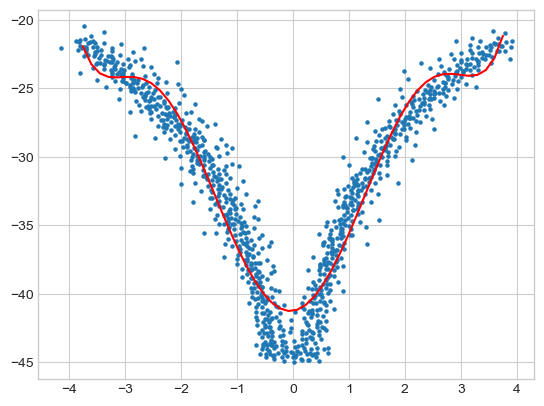

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(6),
                           LinearRegression())
train_csv_path = './optical_injection_locking.csv'
train_csv = pd.read_csv(train_csv_path)
x = train_csv['detuning_frequency']
y = train_csv['injection_ratio']
x_list =[]
y_list =[]
for i in range(len(x)):
    x_list.append(x[i])
for j in range(len(y)):
    y_list.append(y[j])
y_array = np.array(y_list)
x_array = np.array(x_list)
poly_model.fit(x_array[:,np.newaxis], y_array)
xfit = np.linspace(-3.75,3.75,50)
yfit = poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y, s=5)
plt.plot(xfit, yfit, color='red',)